# Data Exploration, Pre-processing and Wrangling

### Assignment 1

In [19]:
!poetry add numpy
!poetry add pandas
!poetry add matplotlib
!poetry add seaborn
!poetry add scikit-learn

# %pip install -q numpy
# %pip install -q pandas
# %pip install -q matplotlib
# %pip install -q seaborn 
# %pip install -q scikit-learn

The following packages are already present in the pyproject.toml and will be skipped:

  - numpy

If you want to update it to the latest compatible version, you can use `poetry update package`.
If you prefer to upgrade it to the latest available version, you can use `poetry add package@latest`.

Nothing to add.
The following packages are already present in the pyproject.toml and will be skipped:

  - pandas

If you want to update it to the latest compatible version, you can use `poetry update package`.
If you prefer to upgrade it to the latest available version, you can use `poetry add package@latest`.

Nothing to add.
The following packages are already present in the pyproject.toml and will be skipped:

  - matplotlib

If you want to update it to the latest compatible version, you can use `poetry update package`.
If you prefer to upgrade it to the latest available version, you can use `poetry add package@latest`.

Nothing to add.
The following packages are already present in the pypro

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/housing.csv')

print("Rows in the data: ", df.shape[0])
print("Columns in the data: ", df.shape[1])
df.head()

Rows in the data:  20640
Columns in the data:  10


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


### Task 12

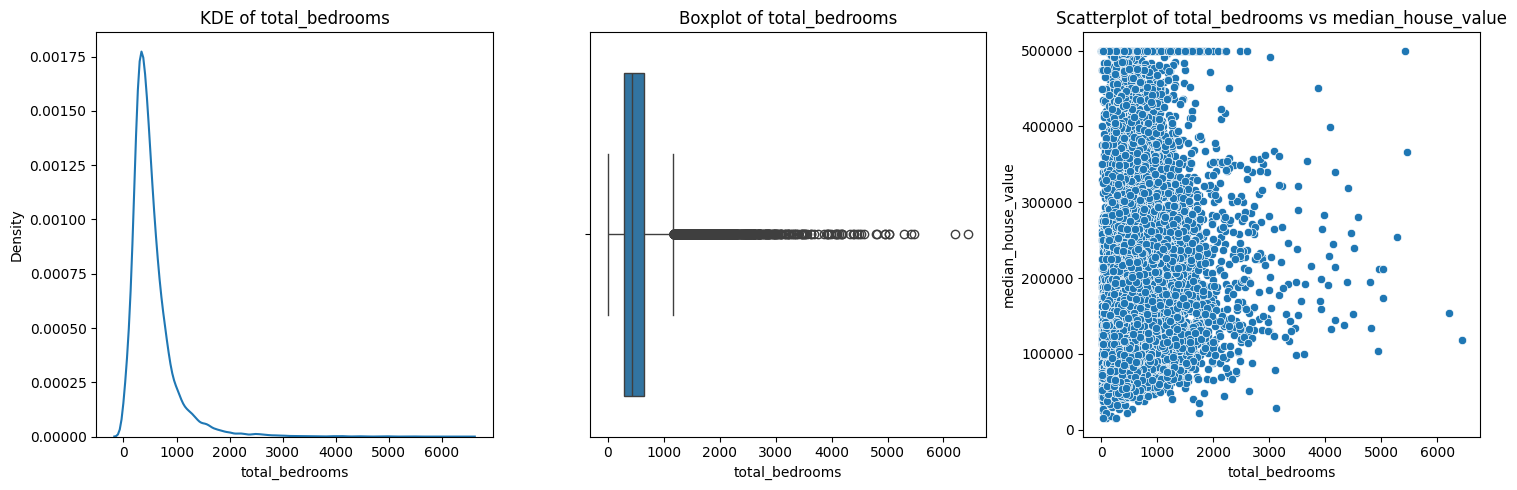

In [12]:
# Task 12
def visualize_col(col):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    sns.kdeplot(df[col], ax=axes[0])
    axes[0].set_title(f'KDE of {col}')
    
    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f'Boxplot of {col}')
    
    sns.scatterplot(x=df[col], y=df['median_house_value'], ax=axes[2])
    axes[2].set_title(f'Scatterplot of {col} vs median_house_value')
    
    plt.tight_layout()
    plt.show()

visualize_col('total_bedrooms')

### Task 13

Total number of outliers in median_house_value: 1383


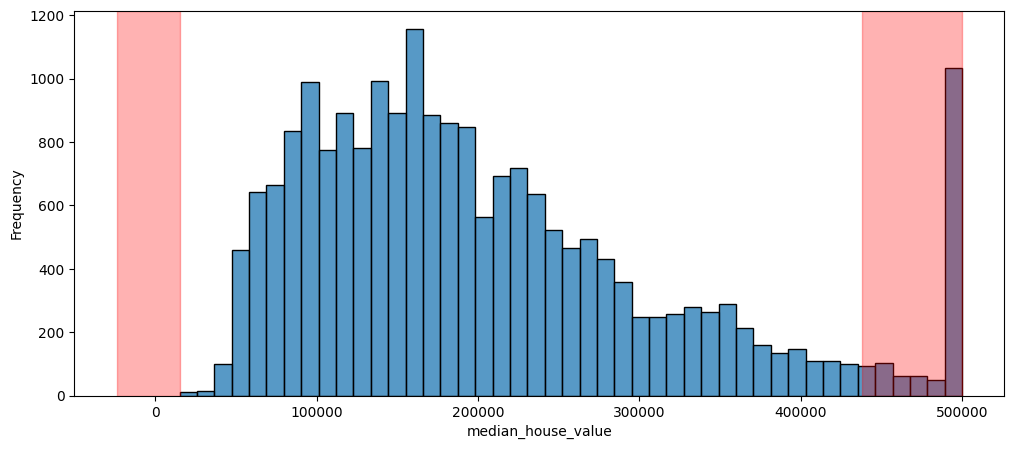

In [18]:
# Task 13
def visualize_outlier(col):
    mean = df[col].mean()
    std_dev = df[col].std()
    
    lower_bound = mean - 2 * std_dev
    upper_bound = mean + 2 * std_dev
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    print(f'Total number of outliers in {col}: {outliers.shape[0]}')
    
    plt.figure(figsize=(12, 5))
    sns.histplot(df[col], bins=45)
    
    plt.axvspan(df[col].min(), lower_bound, color='red', alpha=0.3)
    plt.axvspan(upper_bound, df[col].max(), color='red', alpha=0.3)

    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.show()

visualize_outlier('median_house_value')

### Task 14

In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer, PowerTransformer

In [24]:
numerical_features=df.select_dtypes(include=[np.number]).columns
print(numerical_features)

def scaler(df, numerical_features, scaler):
    scaled_df = pd.DataFrame(scaler.fit_transform(df[numerical_features]), columns=numerical_features)
    return scaled_df

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')


In [33]:
# Standard Scaler
df_standard_scaled = scaler(df, numerical_features, StandardScaler())
df_standard_scaled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-1.327835,1.052548,0.982143,-0.804819,-0.970325,-0.974429,-0.977033,2.344766,2.129631
1,-1.322844,1.043185,-0.607019,2.045890,1.348276,0.861439,1.669961,2.332238,1.314156
2,-1.332827,1.038503,1.856182,-0.535746,-0.825561,-0.820777,-0.843637,1.782699,1.258693
3,-1.337818,1.038503,1.856182,-0.624215,-0.718768,-0.766028,-0.733781,0.932968,1.165100
4,-1.337818,1.038503,1.856182,-0.462404,-0.611974,-0.759847,-0.629157,-0.012881,1.172900


In [35]:
print("StandardScaler ranges:")
df_standard_scaled.describe().loc[['min', 'max']]

StandardScaler ranges:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
min,-2.385992,-1.447568,-2.196180,-1.207283,-1.274093,-1.256123,-1.303984,-1.774299,-1.662641
max,2.625280,2.958068,1.856182,16.815580,14.018707,30.250330,14.601520,5.858286,2.540411


In [36]:
# MinMax Scaler
df_minmax_scaled = scaler(df, numerical_features, MinMaxScaler())
df_minmax_scaled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.902266
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.708247
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.695051
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.672783
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.674638


In [37]:
print("MinMaxScaler ranges:")
df_minmax_scaled.describe().loc[['min', 'max']]

MinMaxScaler ranges:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
